In [63]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 6)

In [147]:
WI_fafsa=r'non_spatial_fafsa/WI (1).xls'
WI_fafsa_xlsx=pd.read_excel(WI_fafsa)
#WI_fafsa_xlsx

In [27]:
#WI_fafsa_xlsx.drop(index=1, inplace=True)
WI_fafsa_xlsx.columns

Index(['Free Application for Federal Student Aid (FAFSA) Submissions by High School \nApplications processed through June 24 of the first 15 months of each cycle',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')

In [37]:
WI_fafsa_xlsx.rename(columns={'Free Application for Federal Student Aid (FAFSA) Submissions by High School \nApplications processed through June 24 of the first 15 months of each cycle':'NAME','Unnamed: 1':'City','Unnamed: 2':'State','Unnamed: 3':'nSubmitted\nJun24 2022', 'Unnamed: 4':'nComplete\nJun24 2022', 'Unnamed: 5':'nSubmitted\nJun24 2021', 'Unnamed: 6':'nComplete\nJun24 2021', 'Unnamed: 7':'nSubmitted\nJun 2021','Unnamed: 8':'nComplete\nJun 2021', 'Unnamed: 9':'nSubmitted\nDec 2021','Unnamed: 10':'nComplete\nDec 2021'  },inplace=True)
WI_fafsa_xlsx

,NAME,City,State,nSubmitted\nJun24 2022,nComplete\nJun24 2022,nSubmitted\nJun24 2021,nComplete\nJun24 2021,nSubmitted\nJun 2021,nComplete\nJun 2021,nSubmitted\nDec 2021,nComplete\nDec 2021
0,NaN,NaN,NaN,2022/ 2023 Cycle,NaN,2021/ 2022 Cycle,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,"Through June 24, 2022",NaN,"Through June 24, 2021",NaN,Through June 2021,NaN,Through December 2021,NaN
2,Name,City,State,Applications\nSubmitted\nJun24 2022,Applications\nComplete\nJun24 2022,Applications\nSubmitted\nJun24 2021,Applications\nComplete\nJun24 2021,Applications\nSubmitted\nJun 2021,Applications\nComplete\nJun 2021,Applications\nSubmitted\nDec 2021,Applications\nComplete\nDec 2021
...,...,...,...,...,...,...,...,...,...,...,...
591,WRIGHTSTOWN HIGH,WRIGHTSTOWN,WI,57,55,62,60,62,60,66,63
592,XAVIER HIGH SCHOOL,APPLETON,WI,72,70,78,76,78,76,80,77
593,YOUTH INITIATIVE HIGH SCHOOL,VIROQUA,WI,6,6,6,6,6,6,6,6


In [45]:
WI_fafsa_xlsx#.drop(index=2, inplace=True)

,NAME,City,State,nSubmitted\nJun24 2022,nComplete\nJun24 2022,nSubmitted\nJun24 2021,nComplete\nJun24 2021,nSubmitted\nJun 2021,nComplete\nJun 2021,nSubmitted\nDec 2021,nComplete\nDec 2021
3,ABBOTSFORD MIDDLE/SENIOR HIGH,ABBOTSFORD,WI,23,21,26,25,26,25,29,28
4,ABUNDANT LIFE CHRISTIAN SCHOOL,MADISON,WI,8,8,9,9,9,9,11,11
5,ADAMS-FRIENDSHIP HIGH,ADAMS,WI,34,33,38,36,39,36,43,42
...,...,...,...,...,...,...,...,...,...,...,...
591,WRIGHTSTOWN HIGH,WRIGHTSTOWN,WI,57,55,62,60,62,60,66,63
592,XAVIER HIGH SCHOOL,APPLETON,WI,72,70,78,76,78,76,80,77
593,YOUTH INITIATIVE HIGH SCHOOL,VIROQUA,WI,6,6,6,6,6,6,6,6


In [49]:
ABBOTSFORD_WI_fafsa_xlsx=WI_fafsa_xlsx[WI_fafsa_xlsx['City']=='ABBOTSFORD']
ABBOTSFORD_WI_fafsa_xlsx.columns

Index(['NAME', 'City', 'State', 'nSubmitted\nJun24 2022',
       'nComplete\nJun24 2022', 'nSubmitted\nJun24 2021',
       'nComplete\nJun24 2021', 'nSubmitted\nJun 2021', 'nComplete\nJun 2021',
       'nSubmitted\nDec 2021', 'nComplete\nDec 2021'],
      dtype='object')

In [48]:
city_list=[]
for i in WI_fafsa_xlsx['City']:
    if i not in city_list:
        city_list.append(i)
        
len(city_list)        

375

In [58]:
#WI_fafsa_xlsx['Jun24_2022_dif']=WI_fafsa_xlsx['nSubmitted\nJun24 2022']-WI_fafsa_xlsx['nComplete\nJun24 2022']
#WI_fafsa_xlsx
for i in WI_fafsa_xlsx['nComplete\nJun24 2022']:
    if i[0]=='<' or i[0]=='>':
        print(WI_fafsa_xlsx[WI_fafsa_xlsx['nComplete\nJun24 2022']==i].index)
        #print(i)

Int64Index([ 30,  37,  46, 110, 151, 164, 172, 174, 189, 205, 225, 230, 234,
            242, 303, 306, 307, 316, 360, 365, 394, 450, 451, 478, 491, 496,
            525, 530, 576, 580, 583],
           dtype='int64')
Int64Index([ 30,  37,  46, 110, 151, 164, 172, 174, 189, 205, 225, 230, 234,
            242, 303, 306, 307, 316, 360, 365, 394, 450, 451, 478, 491, 496,
            525, 530, 576, 580, 583],
           dtype='int64')
Int64Index([ 30,  37,  46, 110, 151, 164, 172, 174, 189, 205, 225, 230, 234,
            242, 303, 306, 307, 316, 360, 365, 394, 450, 451, 478, 491, 496,
            525, 530, 576, 580, 583],
           dtype='int64')
Int64Index([ 30,  37,  46, 110, 151, 164, 172, 174, 189, 205, 225, 230, 234,
            242, 303, 306, 307, 316, 360, 365, 394, 450, 451, 478, 491, 496,
            525, 530, 576, 580, 583],
           dtype='int64')
Int64Index([ 30,  37,  46, 110, 151, 164, 172, 174, 189, 205, 225, 230, 234,
            242, 303, 306, 307, 316, 360, 365, 394,

In [70]:
low_Ncompletion_index=[ 30,  37,  46, 110, 151, 164, 172, 174, 189, 205, 225, 230, 234,
            242, 303, 306, 307, 316, 360, 365, 394, 450, 451, 478, 491, 496,
            525, 530, 576, 580, 583]
low_Ncompletion_name=[]
for i in low_Ncompletion_index:
    low_Ncompletion_name.append(WI_fafsa_xlsx.loc[i, 'NAME'])
low_Ncompletion_name

['BADER HILLEL HIGH SCHOOL',
 'BAY CITY CHRISTIAN SCHOOL',
 'BEREAN CHRISTIAN SCHOOL',
 'COULEE REGION CHRISTIAN SCHOOL',
 'EL PUENTE HIGH',
 'FAITH CHRISTIAN ACADEMY',
 'FOND DU LAC STEM INSTITUTE',
 'FOX CITIES LEADERSHIP ACADEMY',
 'GRACE CHRISTIAN ACADEMY',
 'HAYWARD CTR FOR INDIVIDUALIZED LEARNING',
 'ILEAD CHARTER SCH',
 'INSIGHT SCHOOL OF WISCONSIN HIGH',
 'JAMES E DOTTKE ALTERNATIVE SCHOOL',
 'KENOSHA ESCHOOL',
 'MCKINLEY CHARTER SCHOOL',
 'MELLEN HIGH',
 'MELLEN PUBLIC SCHOOL',
 'MERCER SCHOOL',
 'NORTHLAND LUTHERAN HIGH SCHOOL',
 'NOVA-NORTHWEST OPPORTUNITIES VOCATIONAL ACADEMY',
 'PHELPS HIGH',
 'SCHOOL OF OPTIONS & APPLIED RESEARCH HIGH',
 'SENECA HIGH',
 'SPASH ALTERNATIVE HIGH',
 'ST THOMAS AQUINAS ACADEMY',
 'STOCKBRIDGE HIGH',
 'VALLEY CHRISTIAN SCHOOL',
 'VINCENT ACCELERATED ACADEMY',
 'WINTER HIGH',
 'WISCONSIN CONSERVATORY OF LIFELONG LEARNING',
 'WISCONSIN INSTITUTE FOR TORAH STUDY']

In [88]:
low_WI_fafsa_xlsx=WI_fafsa_xlsx
for i in WI_fafsa_xlsx['NAME']:
    if i not in low_Ncompletion_name:
        low_WI_fafsa_xlsx.drop(index=(low_WI_fafsa_xlsx[low_WI_fafsa_xlsx['NAME']==i].index), inplace=True)
#low_WI_fafsa_xlsx

In [103]:
new_low_WI_fafsa_xlsx=low_WI_fafsa_xlsx.replace('<5', '5')
new_low_WI_fafsa_xlsx

,NAME,City,State,nSubmitted\nJun24 2022,nComplete\nJun24 2022,nSubmitted\nJun24 2021,nComplete\nJun24 2021,nSubmitted\nJun 2021,nComplete\nJun 2021,nSubmitted\nDec 2021,nComplete\nDec 2021
30,BADER HILLEL HIGH SCHOOL,MILWAUKEE,WI,5,5,5,5,5,5,6,6
37,BAY CITY CHRISTIAN SCHOOL,GREEN BAY,WI,5,5,5,5,5,5,5,5
46,BEREAN CHRISTIAN SCHOOL,GALESVILLE,WI,5,5,5,5,5,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...
576,WINTER HIGH,WINTER,WI,5,5,9,9,9,9,9,9
580,WISCONSIN CONSERVATORY OF LIFELONG LEARNING,MILWAUKEE,WI,5,5,5,5,6,5,10,7
583,WISCONSIN INSTITUTE FOR TORAH STUDY,MILWAUKEE,WI,5,5,5,5,5,5,7,7


In [109]:
for i in new_low_WI_fafsa_xlsx['nSubmitted\nJun24 2022']:
    new_low_WI_fafsa_xlsx=new_low_WI_fafsa_xlsx.replace(i,int(i))
for i in new_low_WI_fafsa_xlsx['nComplete\nJun24 2022']:
    new_low_WI_fafsa_xlsx=new_low_WI_fafsa_xlsx.replace(i,int(i))
for i in new_low_WI_fafsa_xlsx['nSubmitted\nJun24 2021']:
    new_low_WI_fafsa_xlsx=new_low_WI_fafsa_xlsx.replace(i,int(i))
for i in new_low_WI_fafsa_xlsx['nComplete\nJun24 2021']:
    new_low_WI_fafsa_xlsx=new_low_WI_fafsa_xlsx.replace(i,int(i))  
for i in new_low_WI_fafsa_xlsx['nSubmitted\nJun 2021']:
    new_low_WI_fafsa_xlsx=new_low_WI_fafsa_xlsx.replace(i,int(i)) 
for i in new_low_WI_fafsa_xlsx['nComplete\nJun 2021']:
    new_low_WI_fafsa_xlsx=new_low_WI_fafsa_xlsx.replace(i,int(i)) 
for i in new_low_WI_fafsa_xlsx['nSubmitted\nDec 2021']:
    new_low_WI_fafsa_xlsx=new_low_WI_fafsa_xlsx.replace(i,int(i)) 
for i in new_low_WI_fafsa_xlsx['nComplete\nDec 2021']:
    new_low_WI_fafsa_xlsx=new_low_WI_fafsa_xlsx.replace(i,int(i)) 


In [110]:
new_low_WI_fafsa_xlsx

,NAME,City,State,nSubmitted\nJun24 2022,nComplete\nJun24 2022,nSubmitted\nJun24 2021,nComplete\nJun24 2021,nSubmitted\nJun 2021,nComplete\nJun 2021,nSubmitted\nDec 2021,nComplete\nDec 2021,dif
30,BADER HILLEL HIGH SCHOOL,MILWAUKEE,WI,5,5,5,5,5,5,6,6,0
37,BAY CITY CHRISTIAN SCHOOL,GREEN BAY,WI,5,5,5,5,5,5,5,5,0
46,BEREAN CHRISTIAN SCHOOL,GALESVILLE,WI,5,5,5,5,5,5,5,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...
576,WINTER HIGH,WINTER,WI,5,5,9,9,9,9,9,9,0
580,WISCONSIN CONSERVATORY OF LIFELONG LEARNING,MILWAUKEE,WI,5,5,5,5,6,5,10,7,0
583,WISCONSIN INSTITUTE FOR TORAH STUDY,MILWAUKEE,WI,5,5,5,5,5,5,7,7,0


In [142]:
#new_low_WI_fafsa_xlsx['dif']=new_low_WI_fafsa_xlsx['dif_Jun24_22']
#new_low_WI_fafsa_xlsx['Jun_22-Jun_21-']=new_low_WI_fafsa_xlsx['nSubmitted\nJun24 2022']-new_low_WI_fafsa_xlsx['nComplete\nJun24 2021']

new_low_WI_fafsa_xlsx.to_excel('new_low_WI_fafsa.xlsx')#.drop('Jun_22-Dec_21-',axis=1, inplace=True)

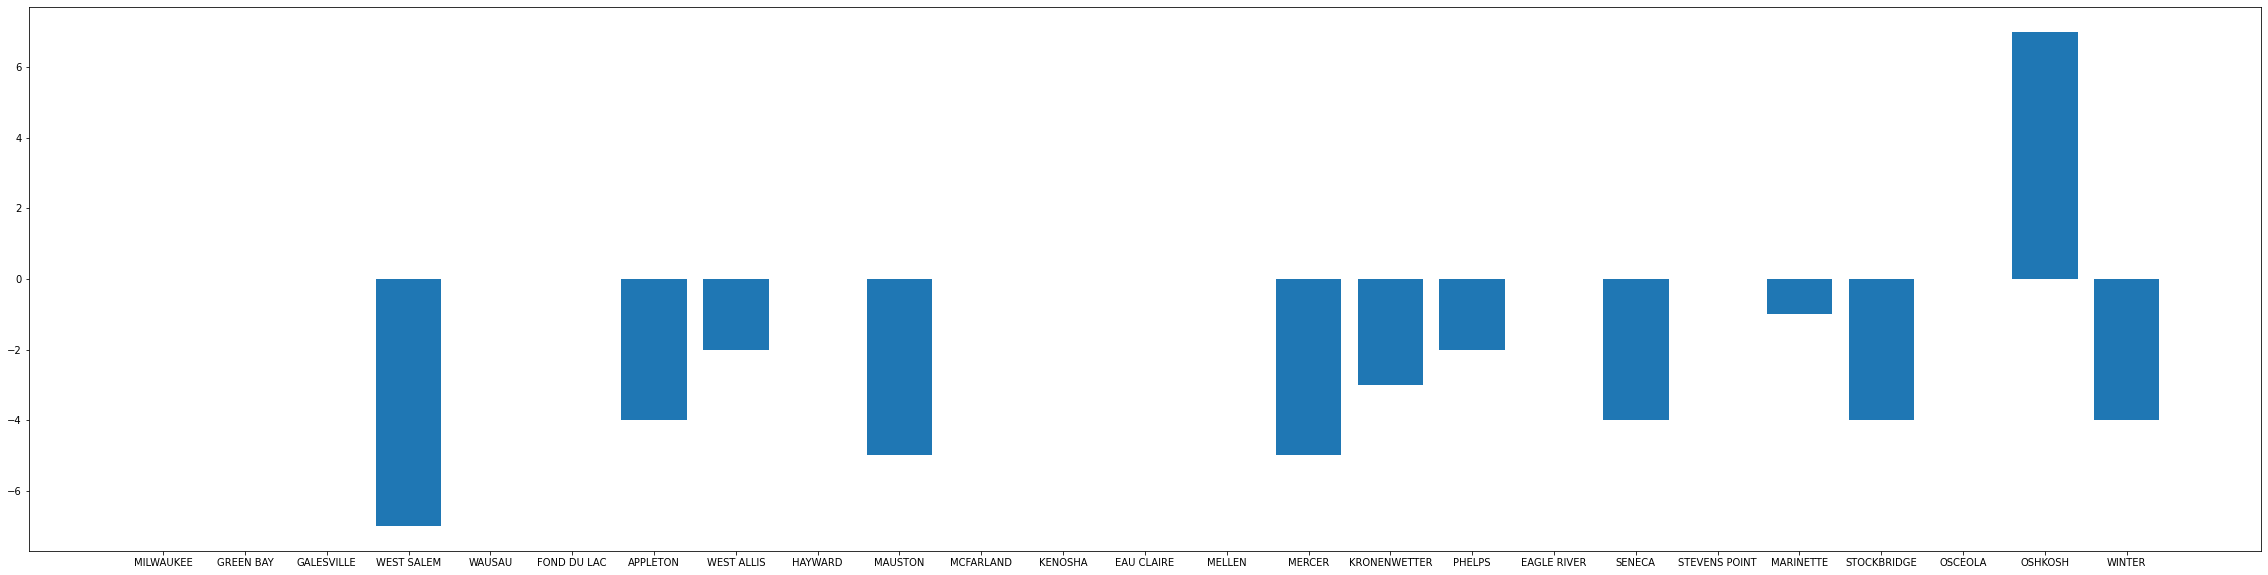

In [141]:
for 
plt.figure(figsize=(40,10))
plt.bar(new_low_WI_fafsa_xlsx['City'],new_low_WI_fafsa_xlsx['Jun_22-Jun_21-'])
#plt.xticks(ange(0,32),)
plt.show()

In [150]:
WI_pub_schl=r'Public_School_Characteristics_2019-20.csv'
WI_pub_schl_xlsx=pd.read_csv(WI_pub_schl)

In [151]:
WI_pub_schl_xlsx

,X,Y,NCESSCH,SURVYEAR,STABR,LEAID,ST_LEAID,LEA_NAME,SCH_NAME,LSTREET1,...,STATUS,UG,AE,SCHOOL_TYPE_TEXT,SY_STATUS_TEXT,SCHOOL_LEVEL,AS,CHARTER_TEXT,MAGNET_TEXT,OBJECTID
0,-149.357863,61.627140,20051000480,2019-2020,AK,200510,AK-33,Matanuska-Susitna Borough School District,John Shaw Elementary,3750 E Paradise Ln,...,1,NaN,NaN,Regular school,1-Currently operational,Elementary,1,2-No,2-No,1
1,-156.754238,71.300337,20061000470,2019-2020,AK,200610,AK-36,North Slope Borough School District,Kiita Learning Community,5246 Karluk St,...,1,NaN,NaN,Alternative Education School,1-Currently operational,High,0,2-No,2-No,2
2,-151.070167,60.491445,20039000448,2019-2020,AK,200390,AK-24,Kenai Peninsula Borough School District,Soldotna Montessori Charter School,158 E Park Ave,...,1,NaN,NaN,Regular school,1-Currently operational,Elementary,2,1-Yes,2-No,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100452,-90.900757,43.558854,551536003122,2019-2020,WI,5515360,WI-5985,Viroqua Area School District,Trillium Middle,100 Blackhawk Dr,...,3,NaN,NaN,Regular school,3-New school,Middle,0,1-Yes,2-No,100453
100453,-88.740856,43.204623,551575003127,2019-2020,WI,5515750,WI-6125,Watertown Unified School District,eCampus Academy Charter School,825 Endeavour Dr,...,7,NaN,NaN,Regular school,7-School to be operational within two years,Not reported,-2,1-Yes,N,100454
100454,-88.247778,43.026062,551578003126,2019-2020,WI,5515780,WI-6174,Waukesha School District,Hawthorne Elementary,1111Maitland Dr,...,3,NaN,NaN,Regular school,3-New school,Elementary,15,2-No,2-No,100455


In [199]:
WI_native_language=r'Public_School_Characteristics_2019-20.csv'
WI_native_language_csv=gpd.read_file(WI_native_language)

In [200]:
pd.set_option('display.max_rows', 20)
WI_native_language_csv#=WI_native_language_csv[WI_native_language_csv['CESA']]

,X,Y,NCESSCH,SURVYEAR,STABR,LEAID,ST_LEAID,LEA_NAME,SCH_NAME,LSTREET1,...,UG,AE,SCHOOL_TYPE_TEXT,SY_STATUS_TEXT,SCHOOL_LEVEL,AS,CHARTER_TEXT,MAGNET_TEXT,OBJECTID,geometry
0,-149.357863,61.6271400000001,020051000480,2019-2020,AK,0200510,AK-33,Matanuska-Susitna Borough School District,John Shaw Elementary,3750 E Paradise Ln,...,,,Regular school,1-Currently operational,Elementary,1,2-No,2-No,1,None
1,-156.754238,71.3003370000001,020061000470,2019-2020,AK,0200610,AK-36,North Slope Borough School District,Kiita Learning Community,5246 Karluk St,...,,,Alternative Education School,1-Currently operational,High,0,2-No,2-No,2,None
2,-151.070167,60.4914450000001,020039000448,2019-2020,AK,0200390,AK-24,Kenai Peninsula Borough School District,Soldotna Montessori Charter School,158 E Park Ave,...,,,Regular school,1-Currently operational,Elementary,2,1-Yes,2-No,3,None
3,-151.279143,60.5682770000001,020039000463,2019-2020,AK,0200390,AK-24,Kenai Peninsula Borough School District,Kaleidoscope School of Arts & Science,549 N Forest Dr,...,,,Regular school,1-Currently operational,Elementary,3,1-Yes,2-No,4,None
4,-151.232337,60.5670030000001,020039000513,2019-2020,AK,0200390,AK-24,Kenai Peninsula Borough School District,Marathon School,405 Marathon Rd,...,,,Alternative Education School,1-Currently operational,High,0,2-No,2-No,5,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100450,-87.932833,43.084056,550960003123,2019-2020,WI,5509600,WI-3619,Milwaukee School District,Andrew S Douglas Middle,3620 N 18th St,...,,,Regular school,3-New school,Middle,2,2-No,2-No,100451,None
100451,-88.4894409999999,43.8159420000001,551074003125,2019-2020,WI,5510740,WI-3983,North Fond du Lac School District,Treffert Way for the Exceptional Mind,1115 Thurke Ave,...,,,Regular school,3-New school,Elementary,1,1-Yes,2-No,100452,None
100452,-90.9007569999999,43.5588540000001,551536003122,2019-2020,WI,5515360,WI-5985,Viroqua Area School District,Trillium Middle,100 Blackhawk Dr,...,,,Regular school,3-New school,Middle,0,1-Yes,2-No,100453,None
100453,-88.740856,43.204623,551575003127,2019-2020,WI,5515750,WI-6125,Watertown Unified School District,eCampus Academy Charter School,825 Endeavour Dr,...,,,Regular school,7-School to be operational within two years,Not reported,-2,1-Yes,N,100454,None


In [204]:
WI_native_language_csv=WI_native_language_csv[WI_native_language_csv['STABR']=='WI']
WI_native_language_csv.columns

Index(['X', 'Y', 'NCESSCH', 'SURVYEAR', 'STABR', 'LEAID', 'ST_LEAID',
       'LEA_NAME', 'SCH_NAME', 'LSTREET1', 'LSTREET2', 'LCITY', 'LSTATE',
       'LZIP', 'LZIP4', 'PHONE', 'GSLO', 'GSHI', 'VIRTUAL', 'TOTFRL', 'FRELCH',
       'REDLCH', 'PK', 'KG', 'G01', 'G02', 'G03', 'G04', 'G05', 'G06', 'G07',
       'G08', 'G09', 'G10', 'G11', 'G12', 'G13', 'TOTAL', 'MEMBER', 'AM', 'HI',
       'BL', 'WH', 'HP', 'TR', 'FTE', 'LATCOD', 'LONCOD', 'ULOCALE', 'NMCNTY',
       'STUTERATIO', 'TITLEI', 'STITLEI', 'AMALM', 'AMALF', 'ASALM', 'ASALF',
       'HIALM', 'HIALF', 'BLALM', 'BLALF', 'WHALM', 'WHALF', 'HPALM', 'HPALF',
       'TRALM', 'TRALF', 'TOTMENROL', 'TOTFENROL', 'STATUS', 'UG', 'AE',
       'SCHOOL_TYPE_TEXT', 'SY_STATUS_TEXT', 'SCHOOL_LEVEL', 'AS',
       'CHARTER_TEXT', 'MAGNET_TEXT', 'OBJECTID', 'geometry'],
      dtype='object')

In [205]:
WI_native_language_csv=WI_native_language_csv[WI_native_language_csv['TITLEI']=='1-Yes']

In [206]:
WI_native_language_csv

,X,Y,NCESSCH,SURVYEAR,STABR,LEAID,ST_LEAID,LEA_NAME,SCH_NAME,LSTREET1,...,UG,AE,SCHOOL_TYPE_TEXT,SY_STATUS_TEXT,SCHOOL_LEVEL,AS,CHARTER_TEXT,MAGNET_TEXT,OBJECTID,geometry
79665,-89.383548,43.0719100000001,550852002670,2019-2020,WI,5508520,WI-3269,Madison Metropolitan School District,Metro School,115 W Doty St,...,,,Alternative Education School,1-Currently operational,Other,0,2-No,2-No,79666,None
79671,-88.1279,42.5097000000001,550005202644,2019-2020,WI,5500052,WI-5780,Trevor-Wilmot Consolidated School District,Trevor-Wilmot Grade,26325 Wilmot Rd,...,,,Regular school,1-Currently operational,Elementary,2,2-No,2-No,79672,None
79672,-89.514841,44.9005230000001,551317002643,2019-2020,WI,5513170,WI-4970,D C Everest Area School District,Mountain Bay Elementary,8602 Schofield Ave,...,,,Regular school,1-Currently operational,Elementary,55,2-No,2-No,79673,None
79676,-88.4087,44.2447000000001,550039002639,2019-2020,WI,5500390,WI-0147,Appleton Area School District,Stephen Foster Elementary Charter,305 W Foster St,...,,,Regular school,1-Currently operational,Elementary,81,1-Yes,2-No,79677,None
79677,-88.4101229999999,44.259197,550039002679,2019-2020,WI,5500390,WI-0147,Appleton Area School District,Appleton Cooperative Educational Center,320 S Walnut St,...,,,Alternative Education School,1-Currently operational,Other,0,2-No,2-No,79678,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100448,-92.153735,44.777834,550435003121,2019-2020,WI,5504350,WI-1666,Elmwood School District,Western Wisconsin Virtual Charter School (WWVC),213 S Scott St,...,,,Regular school,3-New school,Other,0,1-Yes,2-No,100449,None
100449,-92.472461,45.5688450000001,550828003124,2019-2020,WI,5508280,WI-3213,Luck School District,Luck Middle,810 S 7th St,...,,,Regular school,3-New school,Middle,0,2-No,2-No,100450,None
100450,-87.932833,43.084056,550960003123,2019-2020,WI,5509600,WI-3619,Milwaukee School District,Andrew S Douglas Middle,3620 N 18th St,...,,,Regular school,3-New school,Middle,2,2-No,2-No,100451,None
100452,-90.9007569999999,43.5588540000001,551536003122,2019-2020,WI,5515360,WI-5985,Viroqua Area School District,Trillium Middle,100 Blackhawk Dr,...,,,Regular school,3-New school,Middle,0,1-Yes,2-No,100453,None


In [211]:
WI_native_language_csv=WI_native_language_csv[WI_native_language_csv['SCHOOL_LEVEL']=='High']

In [231]:
lunch_schl_list=WI_native_language_csv['SCH_NAME']

In [232]:
lunch_schl_list.to_excel('reduced_lunch_price_school.xlsx')

In [213]:
low_name_match=[]
from fuzzywuzzy import process
for i in new_low_WI_fafsa_xlsx['NAME']:
    name = process.extract(i, WI_native_language_csv['SCH_NAME'], limit=1)
    low_name_match.append(name[0])
low_name_match

C:\Users\iamin\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


[('Ashland High', 86, 79700),
 ('Sparta Alternative Independent Learning School', 86, 79886),
 ('Sparta Alternative Independent Learning School', 86, 79886),
 ('Sparta Alternative Independent Learning School', 86, 79886),
 ('Sparta High Point School', 86, 79689),
 ('Indian Trail High School and Academy', 86, 80231),
 ('Fond du Lac STEM Institute', 100, 91335),
 ('NOVA-Northwest Opportunities Vocational Academy', 86, 80878),
 ('Indian Trail High School and Academy', 86, 80231),
 ('Hayward High', 86, 79959),
 ('iLEAD Charter Sch', 100, 89319),
 ('Insight School of Wisconsin High', 100, 95481),
 ('James E Dottke Alternative School', 100, 81045),
 ('Waukesha East Alternative School', 68, 81190),
 ('Sparta Alternative Independent Learning School', 86, 79886),
 ('Sparta High Point School', 86, 79689),
 ('Sparta Alternative Independent Learning School', 86, 79886),
 ('Sparta High Point School', 86, 79689),
 ('Ashland High', 86, 79700),
 ('NOVA-Northwest Opportunities Vocational Academy', 100,

In [222]:
#new_low_WI_fafsa_xlsx.insert(loc=1,column='Matched_names', value=low_name_match)

In [223]:
#new_low_WI_fafsa_xlsx.drop('Match', axis=1, inplace=True)
new_low_WI_fafsa_xlsx

,NAME,Matched_names,City,State,nSubmitted\nJun24 2022,nComplete\nJun24 2022,nSubmitted\nJun24 2021,nComplete\nJun24 2021,nSubmitted\nJun 2021,nComplete\nJun 2021,nSubmitted\nDec 2021,nComplete\nDec 2021,Jun_22-Jun_21-
30,BADER HILLEL HIGH SCHOOL,"(Ashland High, 86, 79700)",MILWAUKEE,WI,5,5,5,5,5,5,6,6,0
37,BAY CITY CHRISTIAN SCHOOL,(Sparta Alternative Independent Learning Schoo...,GREEN BAY,WI,5,5,5,5,5,5,5,5,0
46,BEREAN CHRISTIAN SCHOOL,(Sparta Alternative Independent Learning Schoo...,GALESVILLE,WI,5,5,5,5,5,5,5,5,0
110,COULEE REGION CHRISTIAN SCHOOL,(Sparta Alternative Independent Learning Schoo...,WEST SALEM,WI,5,5,12,12,12,12,12,12,-7
151,EL PUENTE HIGH,"(Sparta High Point School, 86, 79689)",MILWAUKEE,WI,5,5,7,5,7,5,7,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,VALLEY CHRISTIAN SCHOOL,(Sparta Alternative Independent Learning Schoo...,OSHKOSH,WI,15,13,8,8,8,8,9,9,7
530,VINCENT ACCELERATED ACADEMY,"(Vincent Accelerated Academy, 100, 95485)",MILWAUKEE,WI,5,5,6,5,6,5,10,6,0
576,WINTER HIGH,"(Winter High, 100, 79963)",WINTER,WI,5,5,9,9,9,9,9,9,-4
580,WISCONSIN CONSERVATORY OF LIFELONG LEARNING,"(Wisconsin Dells High, 86, 80574)",MILWAUKEE,WI,5,5,5,5,6,5,10,7,0


In [224]:
for i in new_low_WI_fafsa_xlsx['NAME']:
    print(i)

BADER HILLEL HIGH SCHOOL
BAY CITY CHRISTIAN SCHOOL
BEREAN CHRISTIAN SCHOOL
COULEE REGION CHRISTIAN SCHOOL
EL PUENTE HIGH
FAITH CHRISTIAN ACADEMY
FOND DU LAC STEM INSTITUTE
FOX CITIES LEADERSHIP ACADEMY
GRACE CHRISTIAN ACADEMY
HAYWARD CTR FOR INDIVIDUALIZED LEARNING
ILEAD CHARTER SCH
INSIGHT SCHOOL OF WISCONSIN HIGH
JAMES E DOTTKE ALTERNATIVE SCHOOL
KENOSHA ESCHOOL
MCKINLEY CHARTER SCHOOL
MELLEN HIGH
MELLEN PUBLIC SCHOOL
MERCER SCHOOL
NORTHLAND LUTHERAN HIGH SCHOOL
NOVA-NORTHWEST OPPORTUNITIES VOCATIONAL ACADEMY
PHELPS HIGH
SCHOOL OF OPTIONS & APPLIED RESEARCH HIGH
SENECA HIGH
SPASH ALTERNATIVE HIGH
ST THOMAS AQUINAS ACADEMY
STOCKBRIDGE HIGH
VALLEY CHRISTIAN SCHOOL
VALLEY CHRISTIAN SCHOOL
VINCENT ACCELERATED ACADEMY
WINTER HIGH
WISCONSIN CONSERVATORY OF LIFELONG LEARNING
WISCONSIN INSTITUTE FOR TORAH STUDY


In [225]:
for i in new_low_WI_fafsa_xlsx['Matched_names']:
    print(i)

('Ashland High', 86, 79700)
('Sparta Alternative Independent Learning School', 86, 79886)
('Sparta Alternative Independent Learning School', 86, 79886)
('Sparta Alternative Independent Learning School', 86, 79886)
('Sparta High Point School', 86, 79689)
('Indian Trail High School and Academy', 86, 80231)
('Fond du Lac STEM Institute', 100, 91335)
('NOVA-Northwest Opportunities Vocational Academy', 86, 80878)
('Indian Trail High School and Academy', 86, 80231)
('Hayward High', 86, 79959)
('iLEAD Charter Sch', 100, 89319)
('Insight School of Wisconsin High', 100, 95481)
('James E Dottke Alternative School', 100, 81045)
('Waukesha East Alternative School', 68, 81190)
('Sparta Alternative Independent Learning School', 86, 79886)
('Sparta High Point School', 86, 79689)
('Sparta Alternative Independent Learning School', 86, 79886)
('Sparta High Point School', 86, 79689)
('Ashland High', 86, 79700)
('NOVA-Northwest Opportunities Vocational Academy', 100, 80878)
('Phelps High', 100, 80026)
('S

In [228]:
index_list=['Fond du Lac STEM Institute','iLEAD Charter Sch', 'Insight School of Wisconsin High', 'James E Dottke Alternative School', 'NOVA-Northwest Opportunities Vocational Academy', 'Stockbridge High', 'Vincent Accelerated Academy', 'Winter High', 'Phelps High', 'Seneca High']
for i in new_low_WI_fafsa_xlsx['NAME']:
    if i not in index_list:
        new_low_WI_fafsa_xlsx.drop(index=(new_low_WI_fafsa_xlsx[new_low_WI_fafsa_xlsx['NAME']==i].index), inplace=True)
new_low_WI_fafsa_xlsx

,NAME,Matched_names,City,State,nSubmitted\nJun24 2022,nComplete\nJun24 2022,nSubmitted\nJun24 2021,nComplete\nJun24 2021,nSubmitted\nJun 2021,nComplete\nJun 2021,nSubmitted\nDec 2021,nComplete\nDec 2021,Jun_22-Jun_21-
